In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from nle.dataset import db

In [2]:
def get_dataset_stats(dataset_name, dbfilename=db.DB):
    sql_args = (dataset_name,)
    
    sql = """
    SELECT games.gameid, games.points, games.turns, games.maxlvl
    FROM games
    INNER JOIN datasets ON games.gameid=datasets.gameid
    WHERE datasets.dataset_name=?"""

    with db.connect(dbfilename) as conn:
        data = list(conn.execute(sql, sql_args))
        stats = pd.DataFrame(data, columns=["gameid", "points", "turns", "maxlvl"])
    return stats

In [3]:
dbfilename = "/home/bartek/Workspace/data/nethack/AANAO/ttyrecs.db"

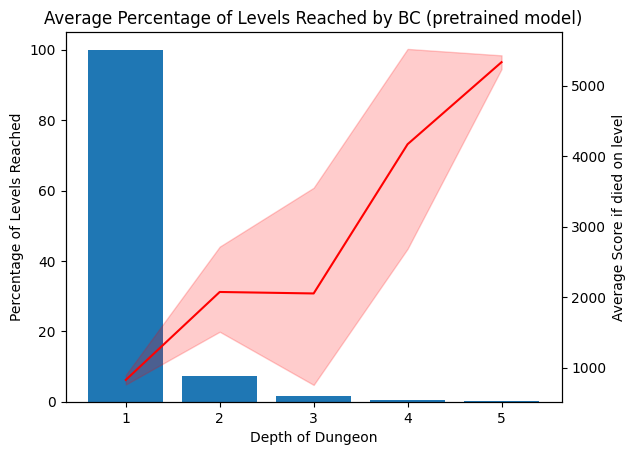

In [65]:
dataset_name = "bc1"
df = get_dataset_stats(dataset_name, dbfilename)

# Example data
levels_reached = df["maxlvl"]
depths = sorted(set(range(1, max(levels_reached) + 1)))
percentage = [sum(1 for level in levels_reached if level >= depth) / len(levels_reached) * 100 for depth in depths]

fig, ax1 = plt.subplots()
ax1.bar(depths, percentage)
ax1.set_xlabel("Depth of Dungeon")
ax1.set_ylabel("Percentage of Levels Reached")

# Create second plot with seaborn
ax2 = ax1.twinx()
ax2.set_ylabel("Average Score if died on level")
sns.lineplot(df, x="maxlvl", y="points", color="red", errorbar=('ci', 90), ax=ax2)

plt.title(f"Average Percentage of Levels Reached by BC (pretrained model)")
plt.show()

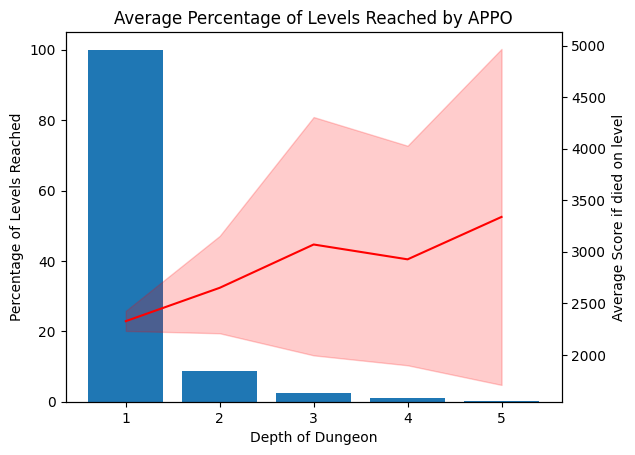

In [66]:
dataset_name = "appo"
df = get_dataset_stats(dataset_name, dbfilename)

# Example data
levels_reached = df["maxlvl"]
depths = sorted(set(range(1, max(levels_reached) + 1)))
percentage = [sum(1 for level in levels_reached if level >= depth) / len(levels_reached) * 100 for depth in depths]

fig, ax1 = plt.subplots()
ax1.bar(depths, percentage)
ax1.set_xlabel("Depth of Dungeon")
ax1.set_ylabel("Percentage of Levels Reached")

# Create second plot with seaborn
ax2 = ax1.twinx()
ax2.set_ylabel("Average Score if died on level")
sns.lineplot(df, x="maxlvl", y="points", color="red", errorbar=('ci', 90), ax=ax2)

plt.title(f"Average Percentage of Levels Reached by APPO")
plt.show()

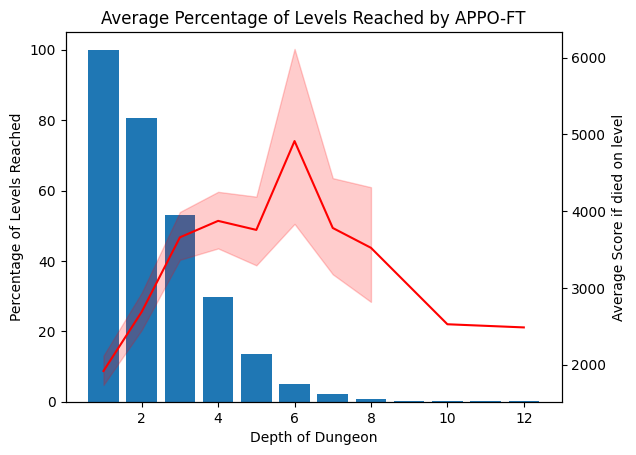

In [67]:
dataset_name = "appo-t"
df = get_dataset_stats(dataset_name, dbfilename)

# Example data
levels_reached = df["maxlvl"]
depths = sorted(set(range(1, max(levels_reached) + 1)))
percentage = [sum(1 for level in levels_reached if level >= depth) / len(levels_reached) * 100 for depth in depths]

fig, ax1 = plt.subplots()
ax1.bar(depths, percentage)
ax1.set_xlabel("Depth of Dungeon")
ax1.set_ylabel("Percentage of Levels Reached")

# Create second plot with seaborn
ax2 = ax1.twinx()
ax2.set_ylabel("Average Score if died on level")
sns.lineplot(df, x="maxlvl", y="points", color="red", errorbar=('ci', 90), ax=ax2)

plt.title(f"Average Percentage of Levels Reached by APPO-FT")
plt.show()

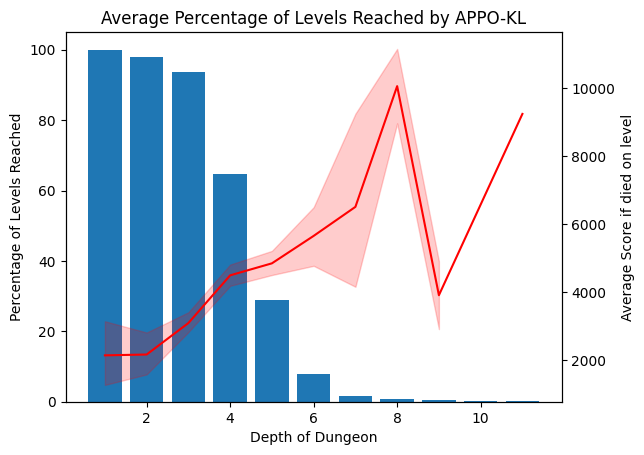

In [68]:
dataset_name = "appo-kl-t"
df = get_dataset_stats(dataset_name, dbfilename)

# Example data
levels_reached = df["maxlvl"]
depths = sorted(set(range(1, max(levels_reached) + 1)))
percentage = [sum(1 for level in levels_reached if level >= depth) / len(levels_reached) * 100 for depth in depths]

fig, ax1 = plt.subplots()
ax1.bar(depths, percentage)
ax1.set_xlabel("Depth of Dungeon")
ax1.set_ylabel("Percentage of Levels Reached")

# Create second plot with seaborn
ax2 = ax1.twinx()
ax2.set_ylabel("Average Score if died on level")
sns.lineplot(df, x="maxlvl", y="points", color="red", errorbar=('ci', 90), ax=ax2)

plt.title(f"Average Percentage of Levels Reached by APPO-KL")
plt.show()

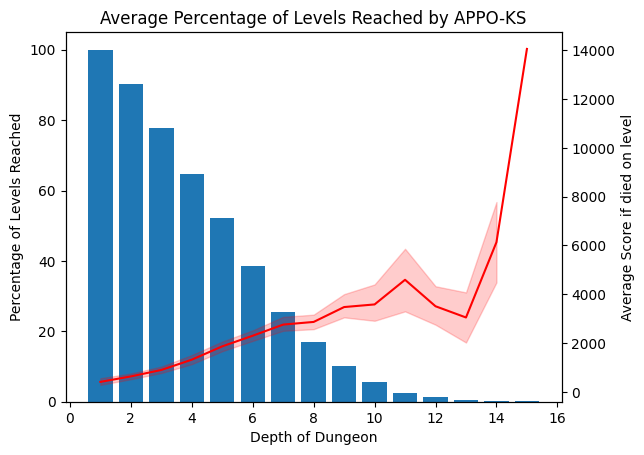

In [69]:
dataset_name = "appo-ks-t"
df = get_dataset_stats(dataset_name, dbfilename)

# Example data
levels_reached = df["maxlvl"]
depths = sorted(set(range(1, max(levels_reached) + 1)))
percentage = [sum(1 for level in levels_reached if level >= depth) / len(levels_reached) * 100 for depth in depths]

fig, ax1 = plt.subplots()
ax1.bar(depths, percentage)
ax1.set_xlabel("Depth of Dungeon")
ax1.set_ylabel("Percentage of Levels Reached")

# Create second plot with seaborn
ax2 = ax1.twinx()
ax2.set_ylabel("Average Score if died on level")
sns.lineplot(df, x="maxlvl", y="points", color="red", errorbar=('ci', 90), ax=ax2)

plt.title(f"Average Percentage of Levels Reached by APPO-KS")
plt.show()

Text(0.5, 1.0, 'NLD-NAO (mean=127217)')

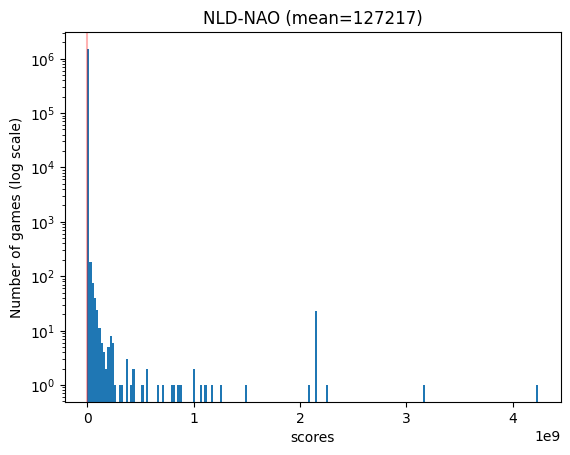

In [110]:
dataset_scores = get_dataset_stats("altorg", dbfilename)
alt_scores = np.array(list(dataset_scores.values()))
plt.hist(alt_scores, bins=200)
plt.axvline(x=alt_scores.mean(), c="red", alpha=0.3)
plt.ylabel('Number of games (log scale)')
plt.xlabel('scores')
plt.yscale('log')
plt.title(f"NLD-NAO (mean={alt_scores.mean().astype(int)})")

In [111]:
np.count_nonzero(np.array(sorted(list(dataset_scores.values()), reverse=True)) > 100000000)

104

In [112]:
len(dataset_scores)

1511228

In [113]:
np.percentile(list(dataset_scores.values()), q=99)

2458346.679999998

Text(0.5, 1.0, 'NLD-AA (mean=10104)')

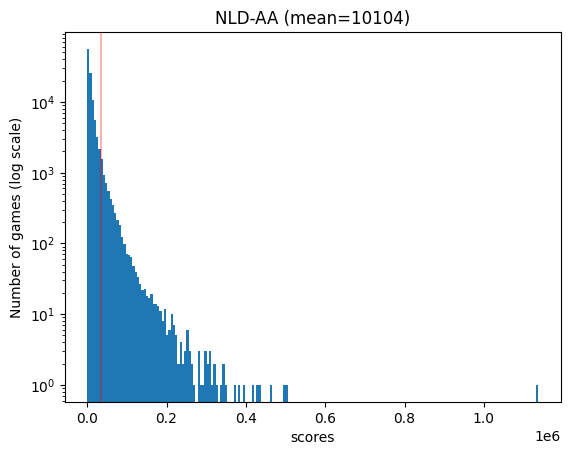

In [114]:
dataset_scores = get_dataset_scores("autoascend", dbfilename)
aa_scores = np.array(list(dataset_scores.values()))
score = np.percentile(list(dataset_scores.values()), q=95)
plt.hist(aa_scores, bins=200)
plt.axvline(x=score, c="red", alpha=0.3)
plt.ylabel('Number of games (log scale)')
plt.xlabel('scores')
plt.yscale('log')
plt.title(f"NLD-AA (mean={aa_scores.mean().astype(int)})")

In [119]:
np.percentile(list(dataset_scores.values()), q=95)

35785.19999999995

In [120]:
len(dataset_scores)

109545

In [121]:
np.count_nonzero(np.array(sorted(list(dataset_scores.values()), reverse=True)) > 35785.19999999995)

5478